# QKD B92
Demonstração do protocolo B92.

In [1]:
# Dependências
from components import Network, Controller
from components.qkd.b92 import create_key, generate_bases, prepara_qubits_b92, apply_measurement_b92, check_key

In [2]:
# Criando uma rede:
rede = Network()
# Definindo a topologia
rows = 3
cols = 4
rede.set_lattice_topology(rows, cols)

# Definindo um controlador
controlador = Controller(rede)

# Informações adicionais
num_mensagens = 10
key_size = 10

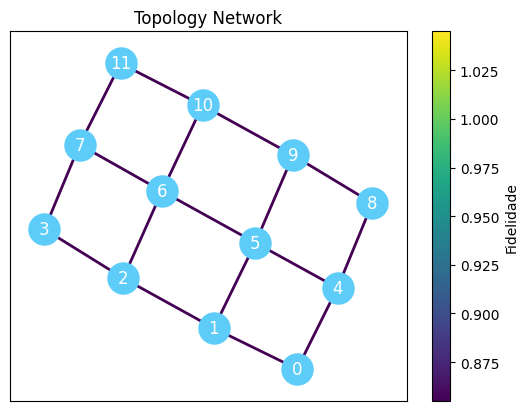

In [3]:
# Visualizando a topologia
rede.draw()

In [4]:
# Main code
for messages in range(num_mensagens):
    # Definindo Alice e Bob
    alice, bob = rede.random_alice_bob()
    
    # Informações para Alice
    key_alice = create_key(key_size)
    
    # Informações para Bob
    bases_bob = generate_bases(key_size)
    
    # Qubits
    qubits = prepara_qubits_b92(key_alice)
    
    # Calculando a rota
    route = controlador.calculate_shortest_route(alice, bob)
    
    # Enviando os qubits
    bob_received_qubits, interference_qubits = rede.send_qubits(route[0], qubits)
        
    # Bob mede os qubits
    key_bob = apply_measurement_b92(bob_received_qubits, bases_bob)
    
    # Qubits sem interferência
    shared_key = check_key(key_bob, key_alice)

    # Print the results
    results = f"""
Chave gerada:           {key_alice}
Chave recebida:         {key_bob}
Qubits interferidos:    {interference_qubits}
Chave final:            {shared_key}
Bits diferentes:        {len(key_alice) - len(shared_key)}
Key sucess:             {len(shared_key) / key_size}
"""
    
    print(results)


Chave gerada:           [0, 0, 0, 0, 0, 0, 1, 0, 1, 1]
Chave recebida:         [0, None, 0, None, 0, 0, None, 0, 1, 1]
Qubits interferidos:    set()
Chave final:            [0, 0, 0, 0, 0, 1, 1]
Bits diferentes:        3
Key sucess:             0.7


Chave gerada:           [1, 0, 1, 1, 0, 1, 0, 1, 1, 0]
Chave recebida:         [0, None, None, None, None, None, None, 1, 1, 0]
Qubits interferidos:    {0}
Chave final:            [1, 1, 0]
Bits diferentes:        7
Key sucess:             0.3


Chave gerada:           [0, 1, 0, 0, 1, 0, 0, 1, 1, 1]
Chave recebida:         [0, None, None, None, None, None, 0, 1, None, None]
Qubits interferidos:    set()
Chave final:            [0, 0, 1]
Bits diferentes:        7
Key sucess:             0.3


Chave gerada:           [0, 0, 1, 0, 0, 1, 1, 0, 0, 0]
Chave recebida:         [None, None, None, 1, None, 1, None, 0, None, None]
Qubits interferidos:    {3, 5}
Chave final:            [1, 0]
Bits diferentes:        8
Key sucess:             0.2


Ch